# Case 4

## Business Problem

You a solmelier on a well known restaurant in the city and you want to have a better understanding of he wines you are selling and see if the restaurant needs new wines.


## Packages Import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

## Data Import

The information was downloaded from a freely available dataset from [Kaggle](https://www.kaggle.com/zynicide/wine-reviews)

In [2]:
df_wine_reviews=pd.read_csv('/work/indu5000_case_4/Data/winemag-data_first150k.csv')
df_wine_reviews.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## Univariate Plotting

### Bar Charts

Bar charts are arguably the simplest data visualization. 
They map categories to numbers: the amount of eggs consumed for breakfast (a category) to a number breakfast-eating Colombians, for example; or, in our case, wine-producing provinces of the world (category) to the number of labels of wines they produce (number):

<AxesSubplot:>

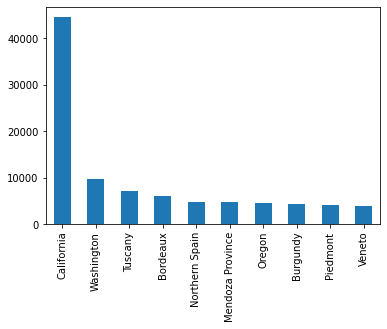

In [3]:
df_wine_reviews['province'].value_counts().head(10).plot.bar()

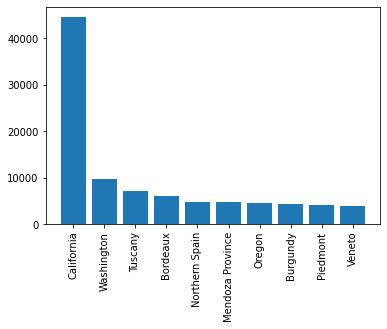

In [4]:
df_wine_reviews_count_by_province = df_wine_reviews['province'].value_counts().head(10)
plt.bar(df_wine_reviews_count_by_province.index,df_wine_reviews_count_by_province.values)
plt.xticks(rotation='vertical');

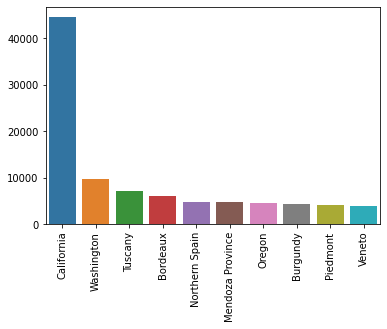

In [5]:
sns.barplot(x=df_wine_reviews_count_by_province.index,y=df_wine_reviews_count_by_province.values);
plt.xticks(rotation='vertical');

Bar charts are very flexible: The height can represent anything, as long as it is a number. And each bar can represent anything, as long as it is a category.

In this case the categories are **nominal categories**: "pure" categories that don't make a lot of sense to order. **Nominal categorical** variables include things like countries, ZIP codes, types of cheese, and lunar landers. The other kind are **ordinal categories**: things that do make sense to compare, like earthquake magnitudes, housing complexes with certain numbers of apartments, and the sizes of bags of chips at your local supermarket.

Or, in our case, the number of reviews of a certain score allotted by Wine Magazine:

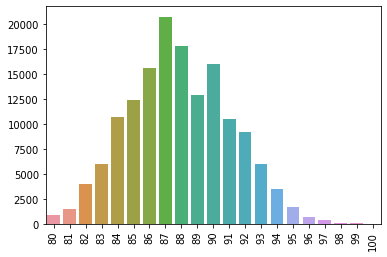

In [6]:
sns.barplot(x=df_wine_reviews['points'].value_counts().sort_index().index,y=df_wine_reviews['points'].value_counts().sort_index().values);
plt.xticks(rotation='vertical');

The bar chart (on pandas or seaborn) can also become a seaborn countplot

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='points', ylabel='count'>

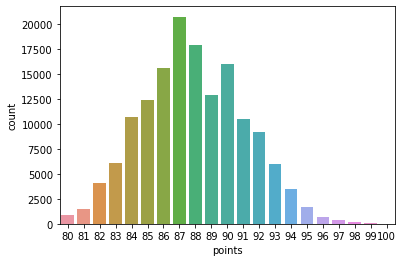

In [7]:
sns.countplot(df_wine_reviews['points'])

Comparing this chart with the bar chart from two notebooks ago, we find that, unlike pandas, seaborn doesn't require us to shape the data for it via value_counts; the countplot (true to its name) aggregates the data for us!

### Line Charts

The wine review scorecard has 20 different unique values to fill, for which our bar chart is just barely enough. What would we do if the magazine rated things 0-100? We'd have 100 different categories; simply too many to fit a bar in for each one.

In that case, instead of bar chart, we could use a line chart:

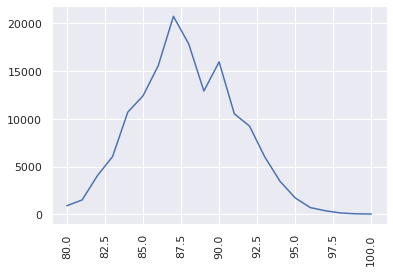

In [8]:

sns.set_theme(style="darkgrid")
sns.lineplot(x=df_wine_reviews['points'].value_counts().sort_index().index,y=df_wine_reviews['points'].value_counts().sort_index().values);
plt.xticks(rotation='vertical');

A line chart can pass over any number of many individual values, making it the tool of first choice for distributions with many unique values or categories.

However, line charts have an important weakness: unlike bar charts, they're not appropriate for nominal categorical data. While bar charts distinguish between every "type" of point line charts mushes them together. So a line chart asserts an order to the values on the horizontal axis, and the order won’t make sense with some data. After all, a "descent" from California to Washington to Tuscany doesn't mean much!

Line charts also make it harder to distinguish between individual values.

In general, if your data can fit into a bar chart, just use a bar chart!

### Question 1

Quick break: bar or line
Let's do a quick exercise. Suppose that we're interested in counting the following variables:

- The number of tubs of ice cream purchased by flavor, given that there are 5 different flavors.
- The average number of cars purchased from American car manufacturers in Michigan.
- Test scores given to students by teachers at a college, on a 0-100 scale.
- The number of restaurants located on the street by the name of the street in Lower Manhattan.


For which of these would a bar chart be better? Which ones would be better off with a line?



### Area Chart

Area charts are just line charts, but with the bottom shaded in. That's it!

<AxesSubplot:>

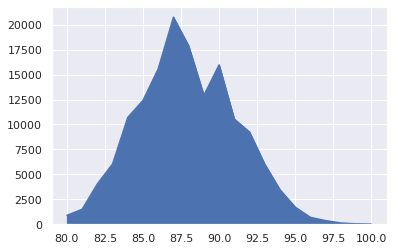

In [9]:
df_wine_reviews['points'].value_counts().sort_index().plot.area()

### Histograms

let's look ooking at yet another type of data, an **interval variable**. 

Examples of interval variables are the wind speed in a hurricane, shear strength in concrete, and the temperature of the sun. An interval variable goes beyond an ordinal categorical variable: it has a meaningful order, in the sense that we can quantify what the difference between two entries is itself an interval variable. Any variable that has infinitely many possible values is definitely an interval variable.

Line charts work well for interval data. Bar charts don't—unless your ability to measure it is very limited, interval data will naturally vary by quite a lot.

Let's apply a new tool, the histogram, to an interval variable in our dataset: price. But we will take a look at the bottles with a price lower than $200 USD

<AxesSubplot:xlabel='price', ylabel='Count'>

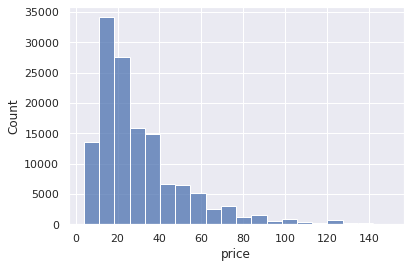

In [10]:
df_wine_reviews_lower_200 = df_wine_reviews[df_wine_reviews['price'] < 150]['price']
number_bins = 20
sns.histplot(df_wine_reviews_lower_200,bins=number_bins)

However, histograms have one major shortcoming (the reason for our 200$ caveat earlier). Because they break space up into even intervals, they don't deal very well with skewed data:

<AxesSubplot:xlabel='price', ylabel='Count'>

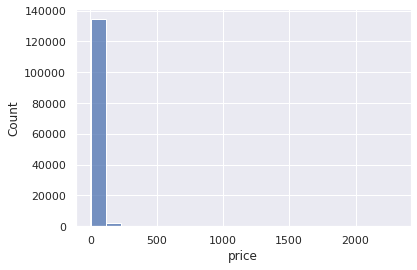

In [11]:
number_bins = 20
sns.histplot(df_wine_reviews['price'],bins=number_bins)

Some of these vintages are really expensive! And the chart will "grow" to include them, to the detriment of the rest of the data being shown.

In [12]:
df_wine_reviews[df_wine_reviews['price'] > 1500]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
13318,13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
34920,34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
34922,34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux


### KDE Plot

This previous information can also be plotted as a KDE Plot. KDE, short for "kernel density estimate", is a statistical technique for smoothing out data noise. It addresses an important fundamental weakness of a line chart: it will buff out outlier or "in-betweener" values which would cause a line chart to suddenly dip.

<AxesSubplot:xlabel='price', ylabel='Density'>

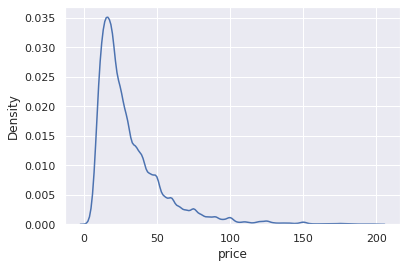

In [13]:
sns.kdeplot(df_wine_reviews.query('price < 200').price)

A KDE plot is better than a line chart for getting the "true shape" of interval data. In fact, I recommend always using it instead of a line chart for such data.

### Question 2

Let's do another exercise. What would the best chart type be for:

- The volume of apples picked at an orchard based on the type of apple (Granny Smith, Fuji, etcetera).
- The number of points won in all basketball games in a season.
- The count of apartment buildings in Chicago by the number of individual units.

### Bivariate Plotting

We explored using pandas to plot and understand relationships within a single column. In this notebook, we'll expand this view by looking at plots that consider two variables at a time.

Data without relationships between variables is the data science equivalent of a blank canvas. To paint the picture in, we need to understand how variables interact with one another. Does an increase in one variable correlate with an increase in another? Does it relate to a decrease somewhere else? The best way to paint the picture in is by using plots that enable these possibilities.

### Scatter plot

The simplest bivariate plot is the lowly scatter plot. A simple scatter plot simply maps each variable of interest to a point in two-dimensional space. This is the result:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


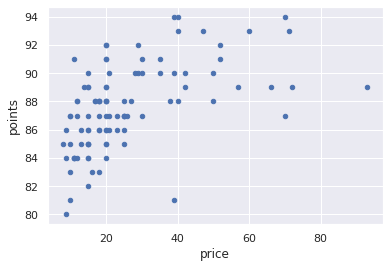

In [14]:
df_wine_reviews[df_wine_reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points');

This plot shows us that price and points are weakly correlated: that is, that more expensive wines do generally earn more points when reviewed.

Note that in order to make effective use of this plot, we had to downsample our data, taking just 100 points from the full set. This is because naive scatter plots do not effectively treat points which map to the same place. For example, if two wines, both costing 100 dollars, get a rating of 90, then the second one is overplotted onto the first one, and we add just one point to the plot.

This isn't a problem if it happens just a few times. But with enough points the distribution starts to look like a shapeless blob, and you lose the forest for the trees:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='price', ylabel='points'>

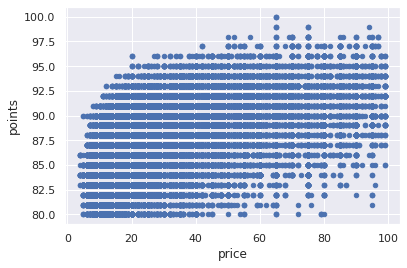

In [15]:
df_wine_reviews[df_wine_reviews['price'] < 100].plot.scatter(x='price', y='points')

### Hexplot

A hex plot aggregates points in space into hexagons, and then colors those hexagons based on the values within them:

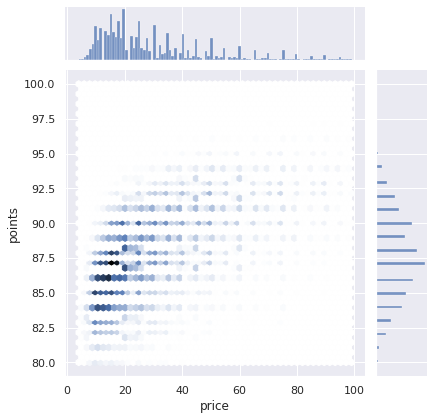

In [16]:
df_wine_reviews_short_1 = df_wine_reviews[df_wine_reviews['price'] < 100]
sns.jointplot(data=df_wine_reviews_short_1, x='price', y='points', kind="hex")


The data in this plot is directly comparable with that in the scatter plot from earlier, but the story it tells us is very different. From this hexplot we can see that the bottles of wine reviewed by Wine Magazine cluster around 87.5 points and around $20.

We did not see this effect by looking at the scatter plot, because too many similarly-priced, similarly-scoring wines were overplotted. By doing away with this problem, this hexplot presents us a much more useful view of the dataset.

Hexplots and scatter plots can by applied to combinations of interval variables and/or ordinal categorical variables.

### Bivariate KDE Plot

KDE plots can also be used in two dimensions. Bivariate KDE plots like this one are a great alternative to scatter plots and hex plots. They solve the same data overplotting issue that scatter plots suffer from and hex plots address, in a different but similarly visually appealing. However, note that bivariate KDE plots are very computationally intensive. We took a sample of 5000 points in this example to keep compute time reasonable.

In [17]:
df_wine_reviews_short_2 = df_wine_reviews[df_wine_reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000)
df_wine_reviews_short_2

,price,points
148875,8.0,88
89841,30.0,83
104373,13.0,85
73976,24.0,87
135407,20.0,82
...,...,...
33487,18.0,85
92544,45.0,91
132109,25.0,87
39116,20.0,86


<AxesSubplot:xlabel='price', ylabel='points'>

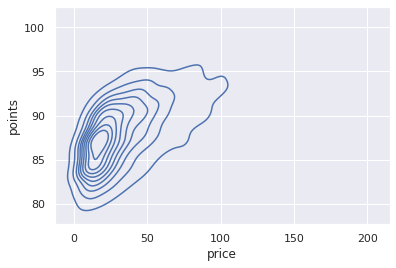

In [18]:
sns.kdeplot(data = df_wine_reviews_short_2, x = 'price', y = 'points')

### Boxplot and violin plot

seaborn provides a boxplot function. It creates a statistically useful plot that looks like this:

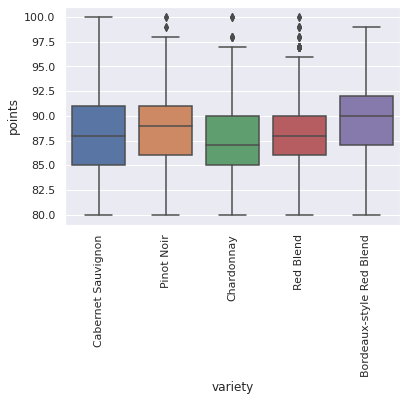

In [19]:
df = df_wine_reviews[df_wine_reviews.variety.isin(df_wine_reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
)
plt.xticks(rotation='vertical');

The center of the distributions shown above is the "box" in boxplot. The top of the box is the 75th percentile, while the bottom is the 25th percentile. In other words, half of the data is distributed within the box! The green line in the middle is the median.

The other part of the plot, the "whiskers", shows the extent of the points beyond the center of the distribution. Individual circles beyond that are outliers.

This boxplot shows us that although all five wines recieve broadly similar ratings, Bordeaux-style wines tend to be rated a little higher than a Chardonnay.

Boxplots are great for summarizing the shape of many datasets. They also don't have a limit in terms of numeracy: you can place as many boxes in the plot as you feel comfortable squeezing onto the page.

### Violin Plot

I find the slightly more advanced violinplot to be more visually enticing, in most cases:

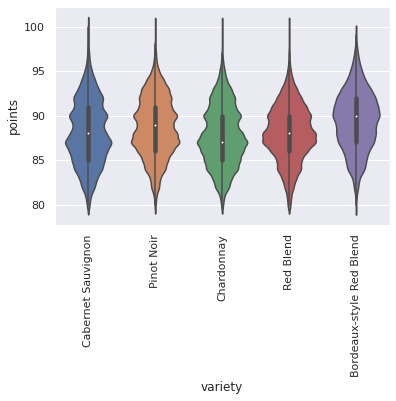

In [20]:
sns.violinplot(
    x='variety',
    y='points',
    data=df_wine_reviews[df_wine_reviews.variety.isin(df_wine_reviews.variety.value_counts()[:5].index)]
)
plt.xticks(rotation='vertical');

## SubPlots

Subplotting is a technique for creating multiple plots that live side-by-side in one overall figure. We can use the subplots method to create a figure with multiple subplots. subplots takes two arguments. The first one controls the number of rows, the second one the number of columns.

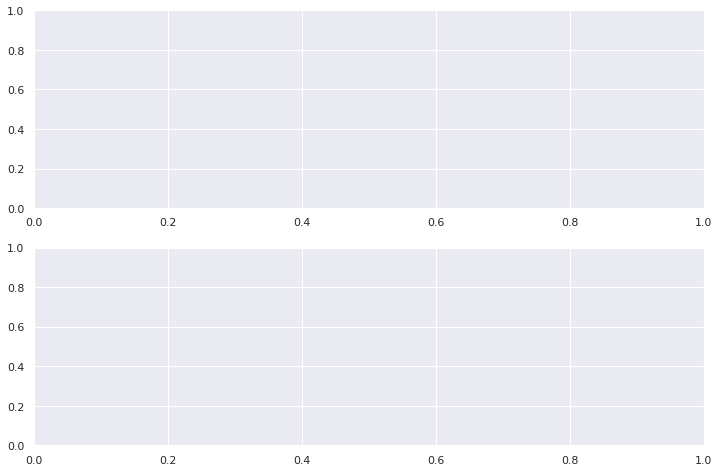

In [21]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

To tell pandas which subplot we want a new plot to go in—the first one or the second one—we need to grab the proper axis out of the list and pass it into pandas via the ax parameter:

<AxesSubplot:>

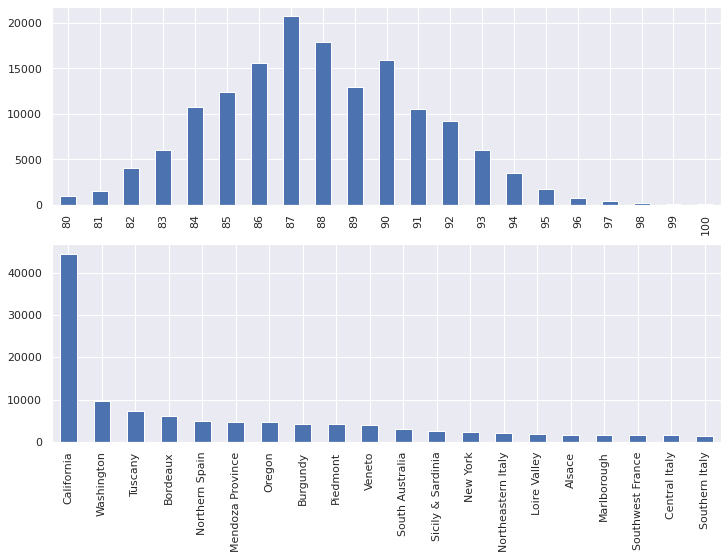

In [22]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

df_wine_reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0]
)

df_wine_reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1]
)

We are of course not limited to having only a single row. We can create as many subplots as we want, in whatever configuration we need.

For example:

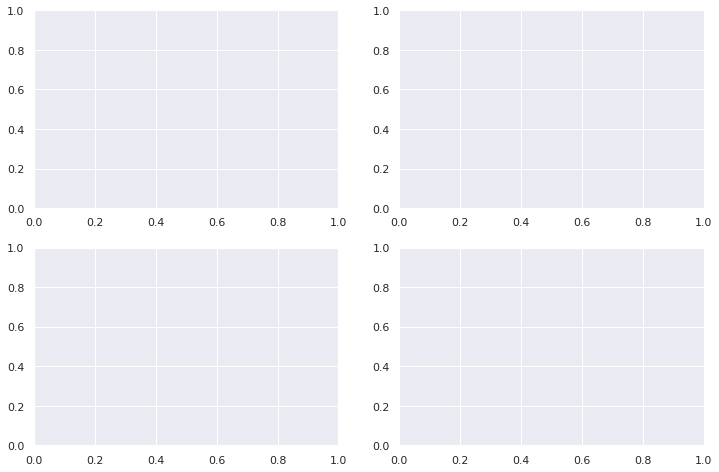

In [23]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

That means that to plot our data from earlier, we now need a row number, then a column number.

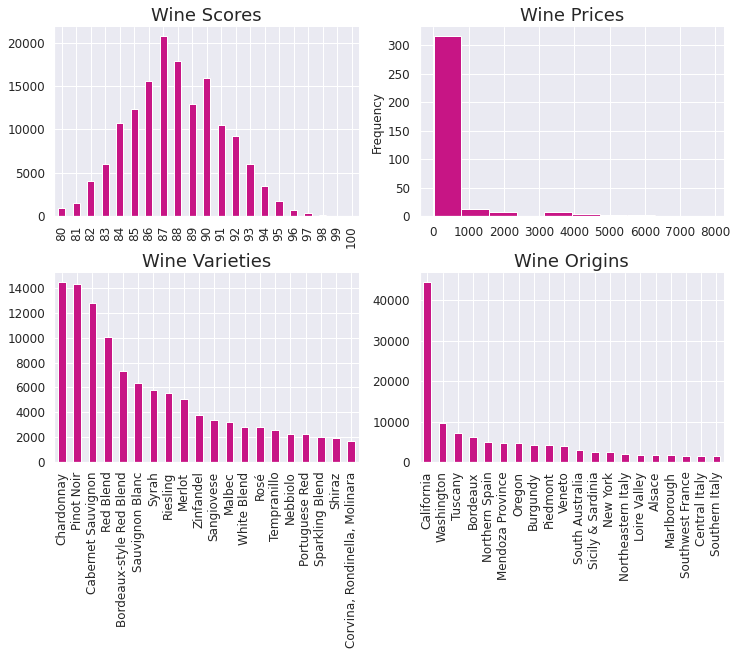

In [26]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

df_wine_reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='mediumvioletred'
)
axarr[0][0].set_title("Wine Scores", fontsize=18)

df_wine_reviews['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='mediumvioletred'
)
axarr[1][0].set_title("Wine Varieties", fontsize=18)

df_wine_reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred'
)
axarr[1][1].set_title("Wine Origins", fontsize=18)

df_wine_reviews['price'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred'
)
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=.3)

sns.despine()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3e4079d-b65d-4f98-a9c4-e84568c199f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>